In [88]:
#merge datasets
#eda analysis
#vaca tools?

import pandas as pd
import scipy
import numpy as np
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import OneHotEncoder
import seaborn as sns
import matplotlib.pyplot as plt

In [89]:
df = pd.read_csv('DataSets/Disease_symptom_and_patient_profile_dataset.csv')
df.head()

,Disease,Fever,Cough,Fatigue,Difficulty Breathing,Age,Gender,Blood Pressure,Cholesterol Level,Outcome Variable
0,Influenza,Yes,No,Yes,Yes,19,Female,Low,Normal,Positive
1,Common Cold,No,Yes,Yes,No,25,Female,Normal,Normal,Negative
2,Eczema,No,Yes,Yes,No,25,Female,Normal,Normal,Negative
3,Asthma,Yes,Yes,No,Yes,25,Male,Normal,Normal,Positive
4,Asthma,Yes,Yes,No,Yes,25,Male,Normal,Normal,Positive


In [90]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 349 entries, 0 to 348
Data columns (total 10 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   Disease               349 non-null    object
 1   Fever                 349 non-null    object
 2   Cough                 349 non-null    object
 3   Fatigue               349 non-null    object
 4   Difficulty Breathing  349 non-null    object
 5   Age                   349 non-null    int64 
 6   Gender                349 non-null    object
 7   Blood Pressure        349 non-null    object
 8   Cholesterol Level     349 non-null    object
 9   Outcome Variable      349 non-null    object
dtypes: int64(1), object(9)
memory usage: 27.4+ KB


In [91]:
df.isnull().sum()

Disease                 0
Fever                   0
Cough                   0
Fatigue                 0
Difficulty Breathing    0
Age                     0
Gender                  0
Blood Pressure          0
Cholesterol Level       0
Outcome Variable        0
dtype: int64

In [92]:
df.describe()

,Age
count,349.000000
mean,46.323782
std,13.085090
min,19.000000
25%,35.000000
50%,45.000000
75%,55.000000
max,90.000000


<Axes: xlabel='Gender', ylabel='count'>

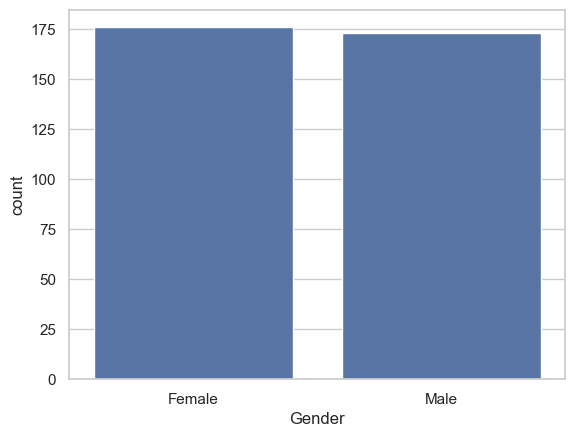

In [93]:

sns.countplot(x='Gender', data=df) 

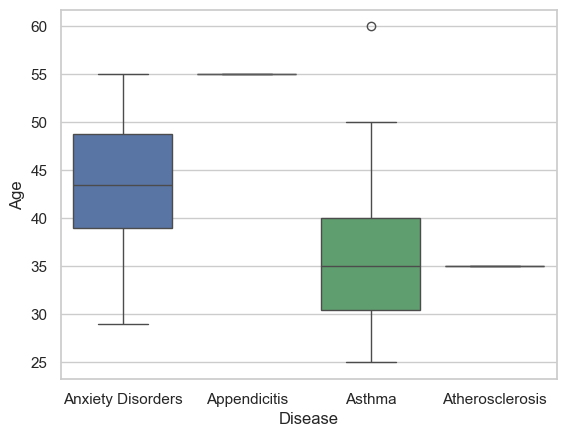

In [96]:
#=0
ls = []
for i in set(df['Disease']):
    ls.append(i)
ls.sort()
ls

for i in ls[4:8]:
    df1=df[df['Disease']==i]
    sns.boxplot(x='Disease',y='Age',data=df1)


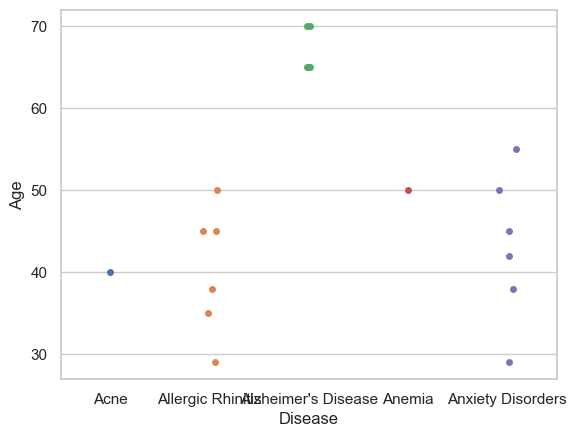

In [ ]:
sns.set(style="whitegrid") 

for i in ls[:5]:
    df1=df[df['Disease']==i]
    sns.stripplot(x='Disease',y='Age',data=df1)


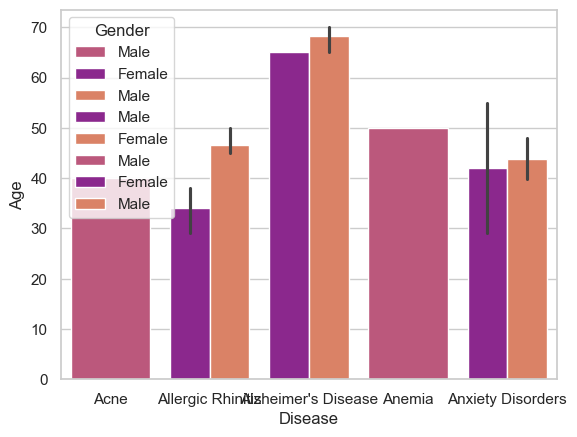

In [95]:


for i in ls[:5]:
    df1=df[df['Disease']==i]
    sns.barplot(x='Disease',y='Age',data=df1,hue='Gender',palette='plasma')


C:\Users\RA\AppData\Local\Temp\ipykernel_6216\1464522600.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x ='Gender', data = df, palette='plasma')


<Axes: xlabel='Gender', ylabel='count'>

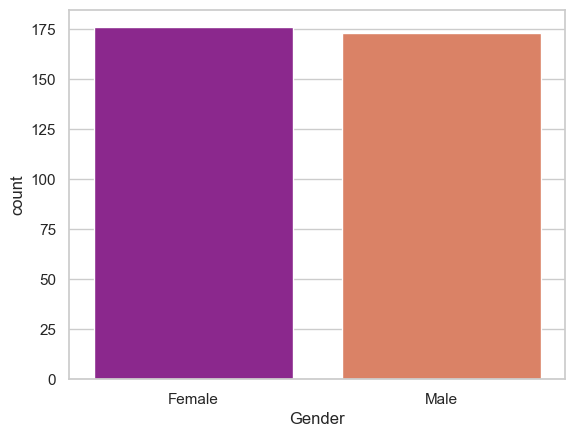

In [ ]:
sns.countplot(x ='Gender', data = df, palette='plasma')  

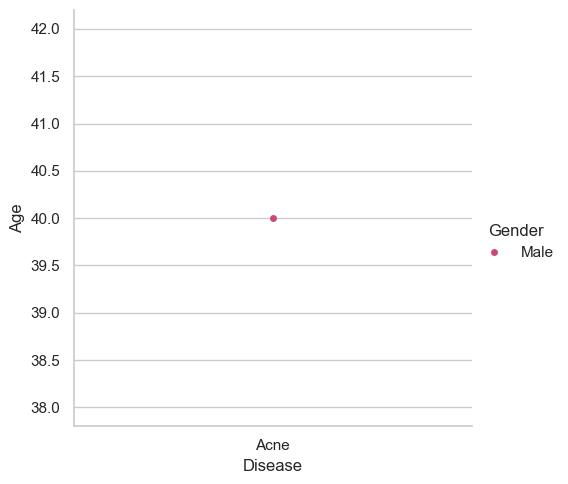

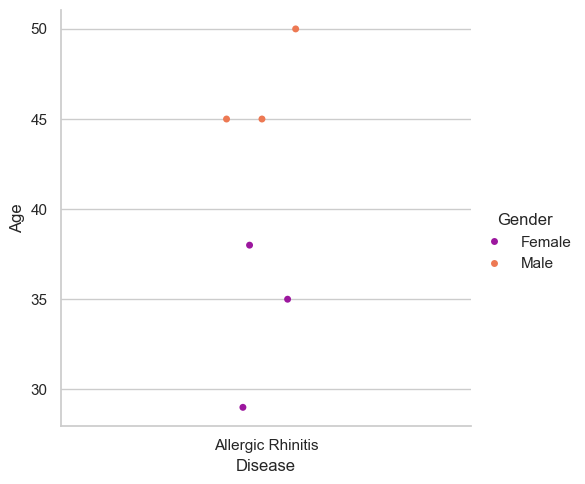

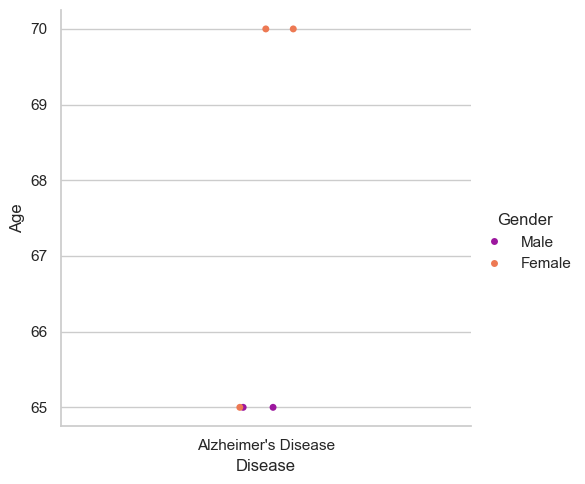

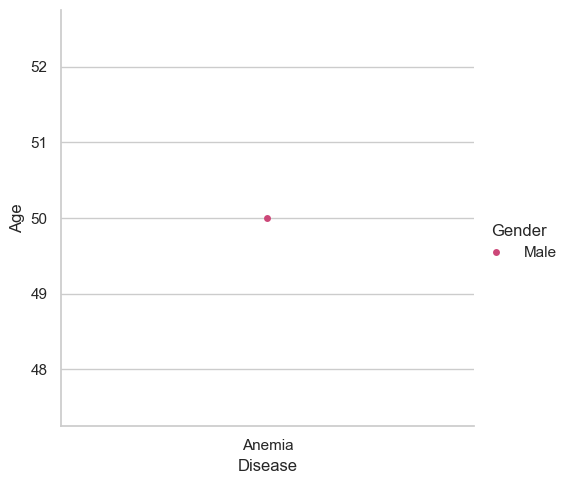

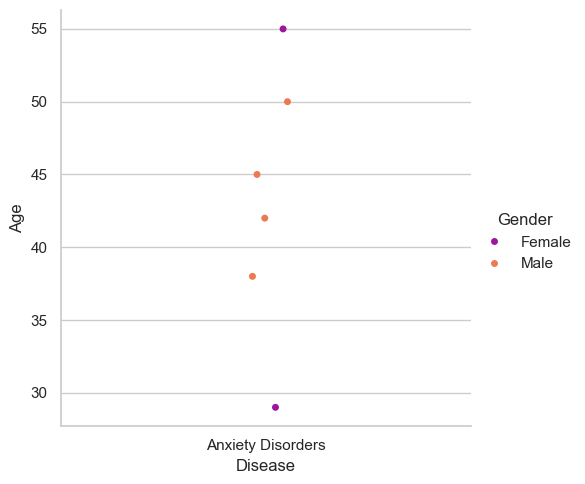

In [ ]:
#sns.heatmap(data=df)


for i in ls[:5]:
    df1=df[df['Disease']==i]
    sns.catplot(x='Disease',y='Age',data=df1,hue='Gender',palette='plasma')


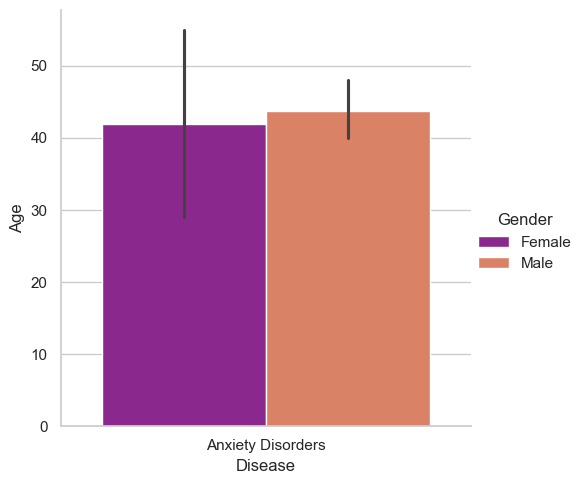

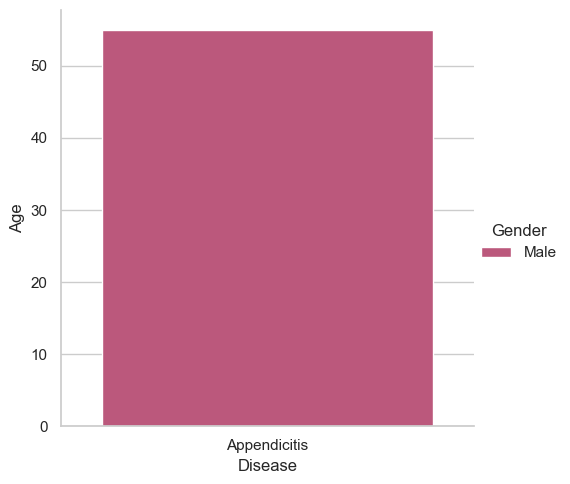

In [ ]:


for i in ls[4:6]:
    df1=df[df['Disease']==i]
    sns.catplot(x='Disease',y='Age',data=df1,hue='Gender',palette='plasma',kind='bar')


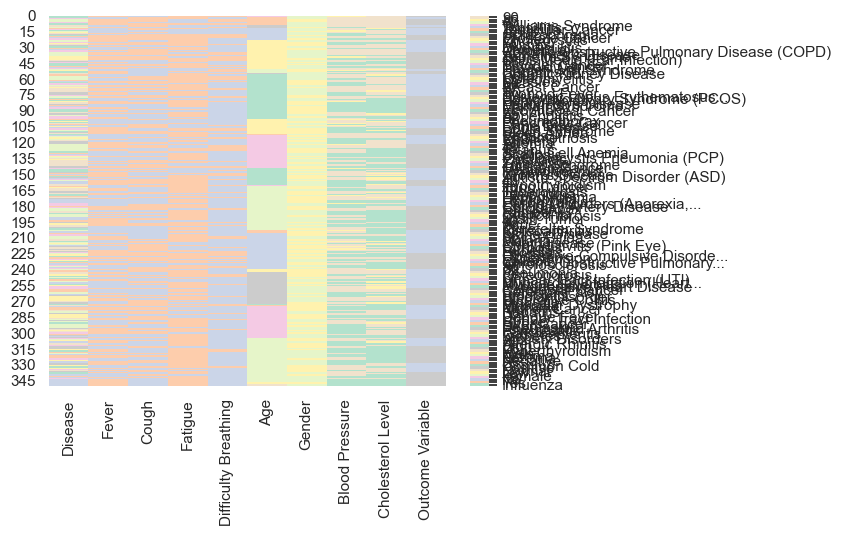

In [ ]:

# df1=df.groupby(ls[0:1])

# df1
value_to_int = {j:i for i,j in enumerate(pd.unique(df.values.ravel()))} # like you did
n = len(value_to_int)     
# discrete colormap (n samples from a given cmap)
cmap = sns.color_palette("Pastel2", n) 
ax = sns.heatmap(df.replace(value_to_int), cmap=cmap) 
# modify colorbar:
colorbar = ax.collections[0].colorbar 
r = colorbar.vmax - colorbar.vmin 
colorbar.set_ticks([colorbar.vmin + r / n * (0.5 + i) for i in range(n)])
colorbar.set_ticklabels(list(value_to_int.keys()))                                          
plt.show()

In [ ]:

one_hot_encoded_data = pd.get_dummies(df, columns = ['Fever', 'Cough','Fatigue','Difficulty Breathing','Cholesterol Level'],dtype=int) 
one_hot_encoded_data
# enc = OneHotEncoder()
# enc_data = pd.DataFrame(enc.fit_transform(df[['Fever','Cough']]).toarray())
# df1 = df.join(enc_data)
# df1.head()


,Disease,Age,Gender,Blood Pressure,Outcome Variable,Fever_No,Fever_Yes,Cough_No,Cough_Yes,Fatigue_No,Fatigue_Yes,Difficulty Breathing_No,Difficulty Breathing_Yes,Cholesterol Level_High,Cholesterol Level_Low,Cholesterol Level_Normal
0,Influenza,19,Female,Low,Positive,0,1,1,0,0,1,0,1,0,0,1
1,Common Cold,25,Female,Normal,Negative,1,0,0,1,0,1,1,0,0,0,1
2,Eczema,25,Female,Normal,Negative,1,0,0,1,0,1,1,0,0,0,1
3,Asthma,25,Male,Normal,Positive,0,1,0,1,1,0,0,1,0,0,1
4,Asthma,25,Male,Normal,Positive,0,1,0,1,1,0,0,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
344,Stroke,80,Female,High,Positive,0,1,1,0,0,1,1,0,1,0,0
345,Stroke,85,Male,High,Positive,0,1,1,0,0,1,1,0,1,0,0
346,Stroke,85,Male,High,Positive,0,1,1,0,0,1,1,0,1,0,0
347,Stroke,90,Female,High,Positive,0,1,1,0,0,1,1,0,1,0,0
